<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_8/Esperienza_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo)

per la regressione lineare usiamo scipy, necessitiamo della matrice di covarianza

retta_fit_xba(x, b,a)

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

#Dati

Misura delle componenti

In [9]:
#resistenza di polo-zero (serie)

rpz_1 = 219.20 *1000 #kohm scala 1000 kohm
err_rpz_1 = math.sqrt(1/3)* math.sqrt( (rpz_1 *0.07/100)**2 + (8)**2 )  #ipotesi uniforme
rpz_2 = 980.00 *1000 #kohm scala 10 megaohm
err_rpz_2 = math.sqrt(1/3)* math.sqrt( (rpz_2 *1/100)**2 + (8000)**2 )  #ipotesi uniforme

rpz = rpz_1 + rpz_2
err_rpz = math.sqrt( (err_rpz_1)**2 + (err_rpz_2)**2 )

print("rpz\n", rpz/1000000, " \pm ", err_rpz/1000000, "  $M\Omega$")

rpz
 1.1992  \pm  0.007304418932710071   $M\Omega$


In [15]:
#componenti amplificatore invertente (rf serie)

rf = 83.45 *1000 #kohm scala 100kohm
err_rf = math.sqrt(1/3)* math.sqrt( (rf* 0.07/100)**2 + (8)**2 )  #ipotesi uniforme

r_in = 6.8 *1000 #kohm scala 10kohm
err_r_in = math.sqrt(1/3)* math.sqrt( (r_in* 0.07/100)**2 + (0.8)**2 )  #ipotesi uniforme

print("rf\n", rf/1000, " \pm ", err_rf/1000, "  kohm" )
print("rin \n",r_in/1000, " \pm ", err_r_in/1000, "  kohm")

rf
 83.45  \pm  0.03404072181471284   kohm
rin 
 6.8  \pm  0.0027867304617897057   kohm


**(3.1) linearità della catena elettronica**

Frequenza = $2 KHz$

$R_{in \ integrstore} = 45.9 K\Omega$, scala $100 KΩ$

In [22]:
r_integratore = 45.9*1000  #ohm
err_r_integratore = math.sqrt(1/3)* math.sqrt( (r_integratore* 0.07/100)**2 + (8)**2 )  #ipotesi uniforme
print("r integratore \n",r_integratore/1000, " \pm ", err_r_integratore/1000, "  kohm")

tempo_31 = [      0.5,   1.0,   1.5,   2.0,   2.5,   3.0,   3.5,   4.0,   4.5,   5.0,   6.0,   7.0,   8.0,   9.0,   10.0,   11.0,   12.0  ] #microsecondi
vout_max_31 = [ 0.158, 0.302, 0.452, 0.596, 0.752, 0.896,  1.05,  1.19,  1.34,  1.48,  1.78,  2.06,  2.34,  2.64,   2.92,   3.20,   3.46  ] #volt
v_su_div_31 = [  0.05,  0.05,   0.1,   0.1,   0.1,   0.2,   0.2,   0.2,   0.2,   0.2,   0.5,   0.5,   0.5,   0.5,    0.5,    0.5,   0.5   ] #volt

r integratore 
 45.9  \pm  0.01911663237427904   kohm


**(3.2) risposta in frequenza**


In [17]:
frequenza_32 =   [ 0.01, 0.0215, 0.0464, 0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215       ] #khz
vin_32 =         [ 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01,  1.01,  1.01, 1.01, 1.02, 1.02, 1.02, 1.06   ] #volt
vout_32 =        [ 12.3, 12.3, 12.3, 12.3, 12.3, 12.2, 12.1, 11.7, 10.4,  6.56,  2.42,  0.616, 0.140, 0.044  ] #volt
v_sudiv_in_32 =  [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2  ] #volt
v_sudiv_out_32 = [ 2, 2, 2, 2, 2,  2, 2,  2, 2, 1, 0.5,  0.1, 0.02,  0.02  ] #volt

#Analisi


Calocolo dell'amplificazione teorica prevista

In [20]:
th_amp = 1 + (rf/r_in)
dummy = math.sqrt( (err_rf)**2 + (err_r_in)**2 )                        #propagazione di uniforme
err_th_amp = math.sqrt( ( dummy/(r_in + rf) )**2 + (err_r_in/r_in)**2 ) #propagazione di uniforme
print("Amplificazione toerica")
print(th_amp, " \pm ", err_th_amp)

Amplificazione toerica
13.272058823529411  \pm  0.0005578234814287114


Verifica del vout alla fine della catena amplificata

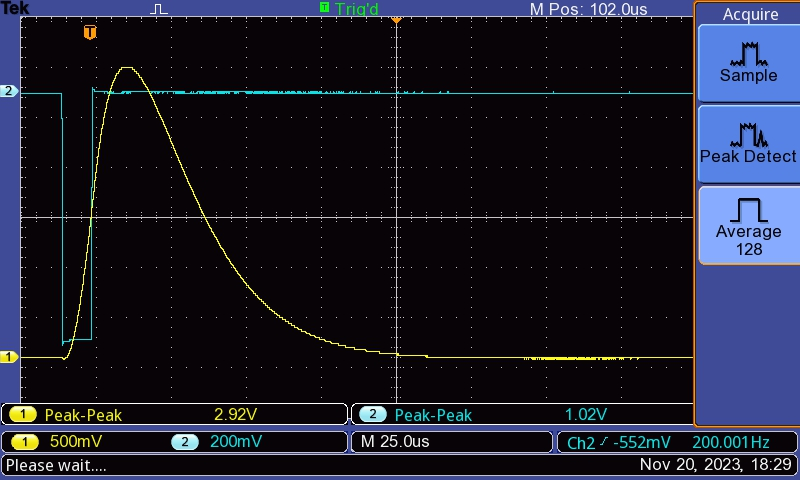

Dal valore della misura automatica Peak to Peak vediamo che il valore del massimo della curva, dopo l'amplificazione, rientra all interno del range desiderato

**(3.1) linearità della catena elettronica**

In [45]:
#@title elaborazione
carica_in = []
carica_in_pico = []

for i in range(len(tempo_31)):
  dummy = 0
  dummy = (1/r_integratore) * tempo_31[i] # microculomb
  carica_in.append(dummy)

for i in carica_in:
  dummy = 0
  dummy = i*1000000  #convertiamo in picoculomb, più maneggiabili
  carica_in_pico.append(dummy)

err_vout_31 = []
for i in range(len(vout_max_31 )):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_su_div_31[i])**2 + (vout_max_31[i]*3/100)**2 )   #ipotesi uniforme
  err_vout_31.append(dummy)

print("Carica in ingresso all'integratpre in pC")
print(carica_in_pico)
print("\n")
print("errore sulle vout max V")
print(err_vout_31)

Carica in ingresso all'integratpre in pC
[10.893246187363834, 21.78649237472767, 32.6797385620915, 43.57298474945534, 54.46623093681917, 65.359477124183, 76.25272331154683, 87.14596949891067, 98.0392156862745, 108.93246187363835, 130.718954248366, 152.50544662309366, 174.29193899782135, 196.078431372549, 217.8649237472767, 239.65141612200435, 261.437908496732]


errore sulle vout max V
[0.003977754810610294, 0.00597449021535171, 0.009727514242258059, 0.011827854130540048, 0.01424726406484183, 0.019343684585242115, 0.021542593468135016, 0.023625480594758982, 0.025923219964605736, 0.028115001926610875, 0.0422356879112124, 0.045895678808939445, 0.04975955519629705, 0.054075995906994925, 0.05823446860179402, 0.06249266623639397, 0.06651927039086743]


Regressione lineare

In [36]:
regrlin_pear_errpost_xys(carica_in_pico, vout_max_31, err_vout_31)

pendenza $b$	 0.013430373822629628
$\sigma_b$	 9.069703509531096e-05
intercetta $a$	 0.012069131368536712
$\sigma_a$	 0.0037698468346748387
Coefficiente di Pearson $\rho_{xy}$	 0.9999195959119999
$\sigma_{\rho_{xy}}$	 0.0032741585298916532
Errore a posteriori $\delta$	 0.020226214538889484


chi quadro 
 2.818005645545211
NDOF  
 15


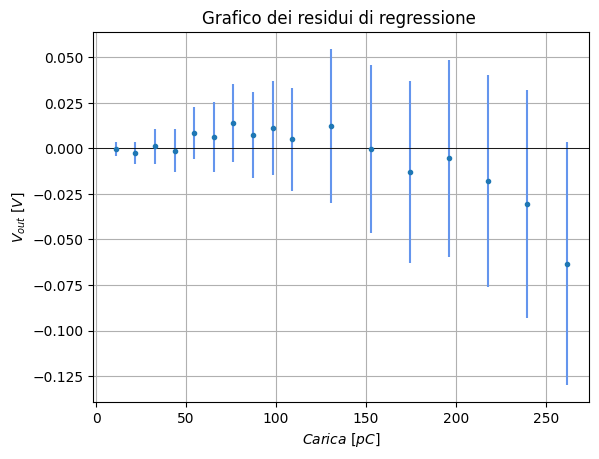

In [38]:
chi_quadro_lineare(vout_max_31, carica_in_pico, err_vout_31, 0.012069131368536712, 0.013430373822629628, "$V_{out} \ [V]$", "$Carica \ [pC]$", "")

Simulazione

Grafico

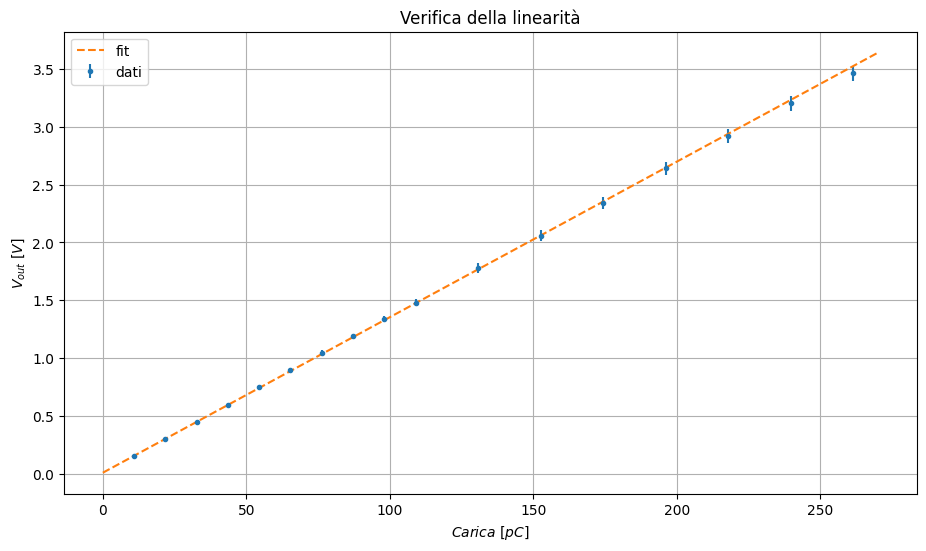

In [50]:
plt.figure(figsize=(11,6))
plt.errorbar(carica_in_pico, vout_max_31, yerr=err_vout_31, marker=".", linestyle="", label="dati")
plt.title("Verifica della linearità")
plt.ylabel("$V_{out} \ [V]$")
plt.xlabel("$Carica \ [pC]$")
plt.plot( np.linspace(0,270,300), retta_fit_xba(np.linspace(0,270,300), 0.013430373822629628, 0.012069131368536712), marker="", linestyle="--", label="fit"  )
plt.grid()
plt.legend()

**(3.2) risposta in frequenza**

In [47]:
#@title elaborazione
frequenza_hz = []
for i in frequenza_32:
  dummy = 0
  dummy = i*1000
  frequenza_hz.append(dummy)

lunghezza = range(len(vout_32))

err_vout_32 = []
for i in lunghezza:
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_sudiv_out_32[i])**2 + (vout_32[i]* 3/100)**2 )          #ipotesi uniforme
  err_vout_32.append(dummy)
print("Errore sulle vout")
print(err_vout_32)

err_vin_32 = []
for i in lunghezza:
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_sudiv_in_32[i])**2 + (vin_32[i]* 3/100)**2 )            #ipotesi uniforme
  err_vin_32.append(dummy)
print("\n Errore sulle vin")
print(err_vin_32)

A = []
for i in lunghezza:
  dummy = 0
  dummy = vout_32[i] / vin_32[i]
  A.append(dummy)
print("\n ampiezza (vout/vin)")

err_A = []
for i in lunghezza:
  dummy = 0
  dummy = A[i]* math.sqrt( ( err_vout_32[i]/vout_32[i] )**2 + ( err_vin_32[i]/vin_32[i] )**2 )      #propagazione di una uniforme
  err_A.append(dummy)
print("\n errore su ampiezza")
print(err_A)

log_A = []
for i in lunghezza:
  dummy = 0
  dummy = 20*np.log10(A[i])
  log_A.append(dummy)
print("\n ampiezza in decibel")
print(log_A)

err_log_A = []
for i in lunghezza:
  dummy = 0
  dummy = (20*err_A[i]) / (A[i]*math.log(10))                                                       #propagazione di propagazione
  err_log_A.append(dummy)
print("\n errore ampiezza decibel")
print(err_log_A)

Errore sulle vout
[0.24232278748259178, 0.24232278748259178, 0.24232278748259178, 0.24232278748259178, 0.24232278748259178, 0.24080143964132217, 0.23928295662945434, 0.23323879037015544, 0.21396572934312014, 0.12744965018913676, 0.05089453146786335, 0.012131369804491714, 0.002685764943797825, 0.0013835220754774148]

 Errore sulle vin
[0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.020960995523431933, 0.02110576540505777, 0.02110576540505777, 0.02110576540505777, 0.021689014116214073]

 ampiezza (vout/vin)

 errore su ampiezza
[0.34848371997822725, 0.34848371997822725, 0.34848371997822725, 0.34848371997822725, 0.34848371997822725, 0.3459565690247418, 0.34343167934790647, 0.3333557603545808, 0.3009094951791519, 0.18464284490529936, 0.0699982505140509, 0.017251460073583327, 0.0038728825555424885, 0.0015572243134318732]

 ampiezza in decib

Simulazione

Grafico finale

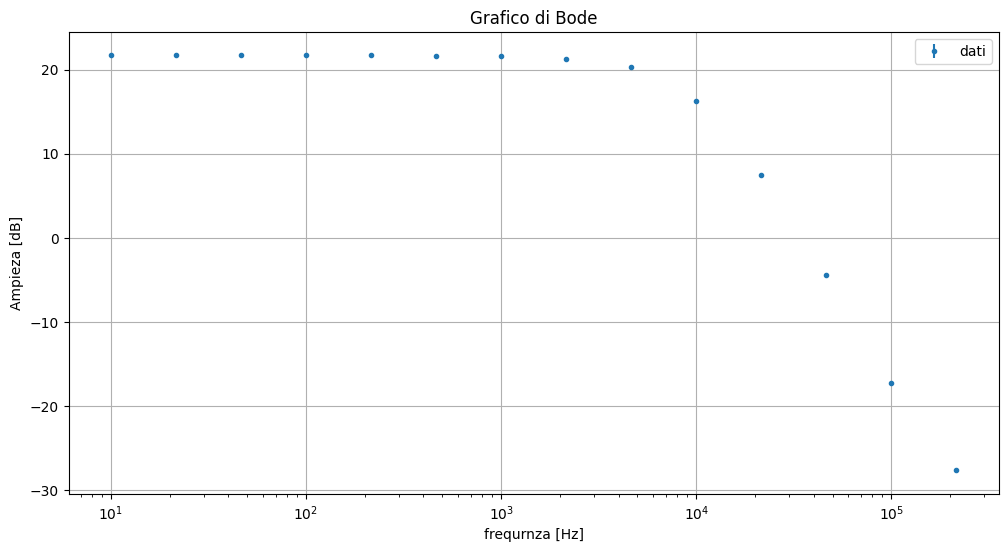

In [52]:
plt.figure(figsize=(12,6))
plt.errorbar( frequenza_hz, log_A, yerr=err_log_A, marker=".", linestyle="", label="dati")
plt.xscale("log", base=10)
plt.title("Grafico di Bode")
plt.xlabel("frequrnza [Hz]")
plt.ylabel("Ampieza [dB]")

plt.grid()
plt.legend()

Grafico tipico di un filtro passa-basso (integratore)

#Librerie

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()

In [3]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [4]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)